[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/3.2%20FinanceDataReader%EB%A5%BC%20%ED%86%B5%ED%95%9C%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%20%EC%88%98%EC%9D%B5%EB%A5%A0%20%EB%B9%84%EA%B5%90-input.ipynb)


* **이번 노트북의 실습은 FinanceDataReader의 여러 종목 가격을 한번에** 자료를 참고하여 만들어 졌습니다.
* 참고 링크 :  [FinanceDataReader 여러 종목 가격을 한번에](https://nbviewer.jupyter.org/github/FinanceData/FinanceDataReader/blob/master/tutorial/FinanceDataReader%20Tutorial%20-%20%EC%97%AC%EB%9F%AC%20%EC%A2%85%EB%AA%A9%EC%9D%98%20%EA%B0%80%EA%B2%A9%EC%9D%84%20%ED%95%9C%EB%B2%88%EC%97%90.ipynb)


## 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위해 pandas 불러오기


* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [ ]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
!pip install -U finance-datareader

     |████████████████████████████████| 48 kB 2.4 MB/s 


In [ ]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
fdr.StockListing("KRX").to_csv("krx.csv",index=False)
df = pd.read_csv("krx.csv")

## 상장종목 목록 가져오기

In [ ]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}


In [ ]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

dict

In [ ]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [ ]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [ ]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for item in stock_dict.values():
  item_list.append(fdr.DataReader(item,"2017")["Close"])

In [ ]:
item_list

[Date
 2017-01-02    36100
 2017-01-03    36480
 2017-01-04    36160
 2017-01-05    35560
 2017-01-06    36200
               ...  
 2022-04-22    67000
 2022-04-25    66300
 2022-04-26    66100
 2022-04-27    65000
 2022-04-28    64800
 Name: Close, Length: 1308, dtype: int64, Date
 2017-01-02     45800
 2017-01-03     47250
 2017-01-04     46500
 2017-01-05     46950
 2017-01-06     48000
                ...  
 2022-04-22    110500
 2022-04-25    108000
 2022-04-26    111000
 2022-04-27    108500
 2022-04-28    109500
 Name: Close, Length: 1308, dtype: int64, Date
 2017-01-02    150000
 2017-01-03    153000
 2017-01-04    154000
 2017-01-05    153500
 2017-01-06    151000
                ...  
 2022-04-22    180000
 2022-04-25    182000
 2022-04-26    187000
 2022-04-27    187000
 2022-04-28    188500
 Name: Close, Length: 1308, dtype: int64, Date
 2017-01-02     97761
 2017-01-03     96316
 2017-01-04     95864
 2017-01-05     96135
 2017-01-06     95142
                ...  
 2022-

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [ ]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list,axis=1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2017-01-02,36100,45800,150000,97761,253000,260500,125500,155620
2017-01-03,36480,47250,153000,96316,262000,256000,129000,153617
2017-01-04,36160,46500,154000,95864,268500,254500,129000,162230
2017-01-05,35560,46950,153500,96135,267500,247500,128000,158424
2017-01-06,36200,48000,151000,95142,266000,250000,129000,160026
...,...,...,...,...,...,...,...,...
2022-04-22,67000,110500,180000,159000,486000,295500,110000,300000
2022-04-25,66300,108000,182000,155500,486000,286000,108000,288500
2022-04-26,66100,111000,187000,168000,475000,284000,108500,287000


### 시각화를 위한 폰트 설정

In [ ]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [ ]:
get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


'NanumBarunGothic'

In [ ]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


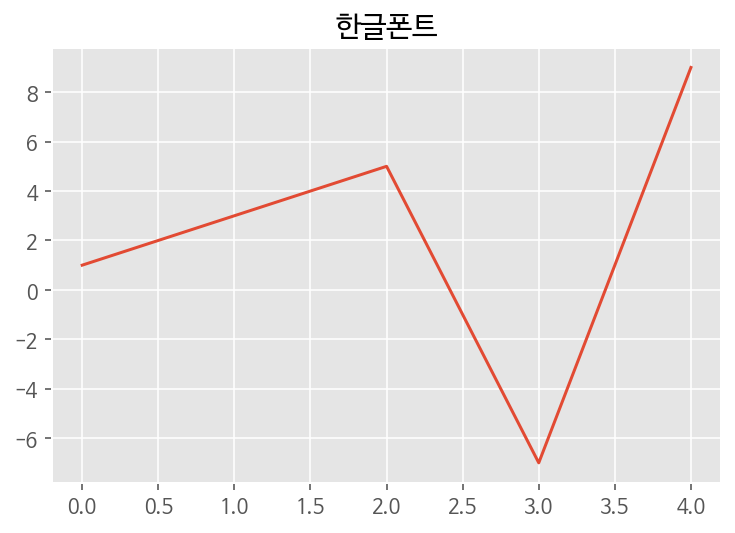

In [ ]:
# 한글폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

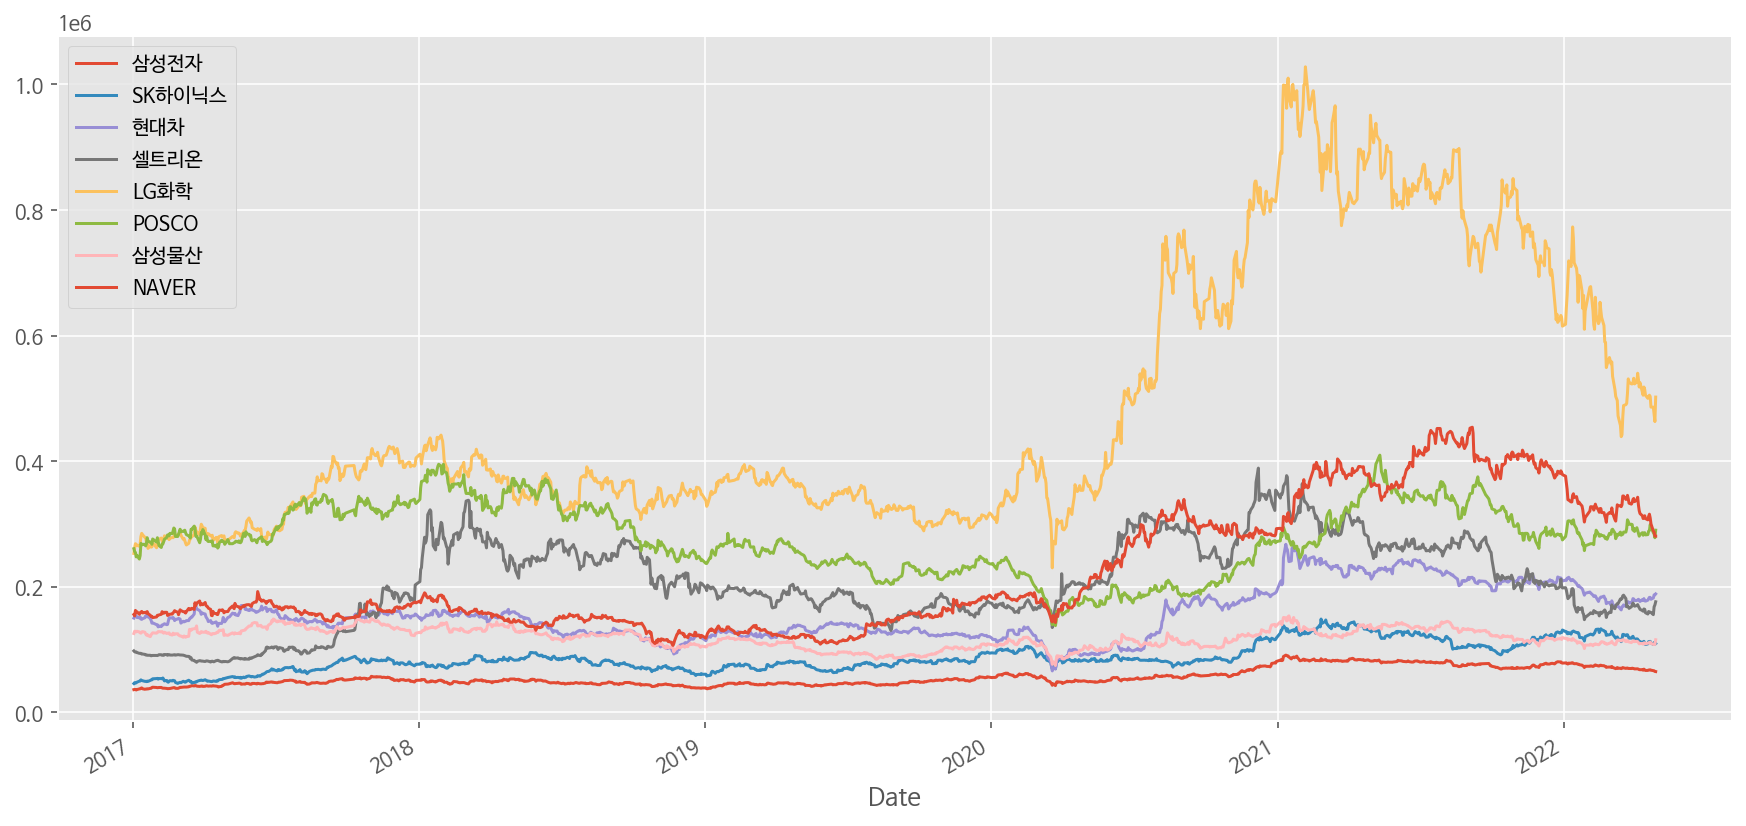

In [ ]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(15,7))

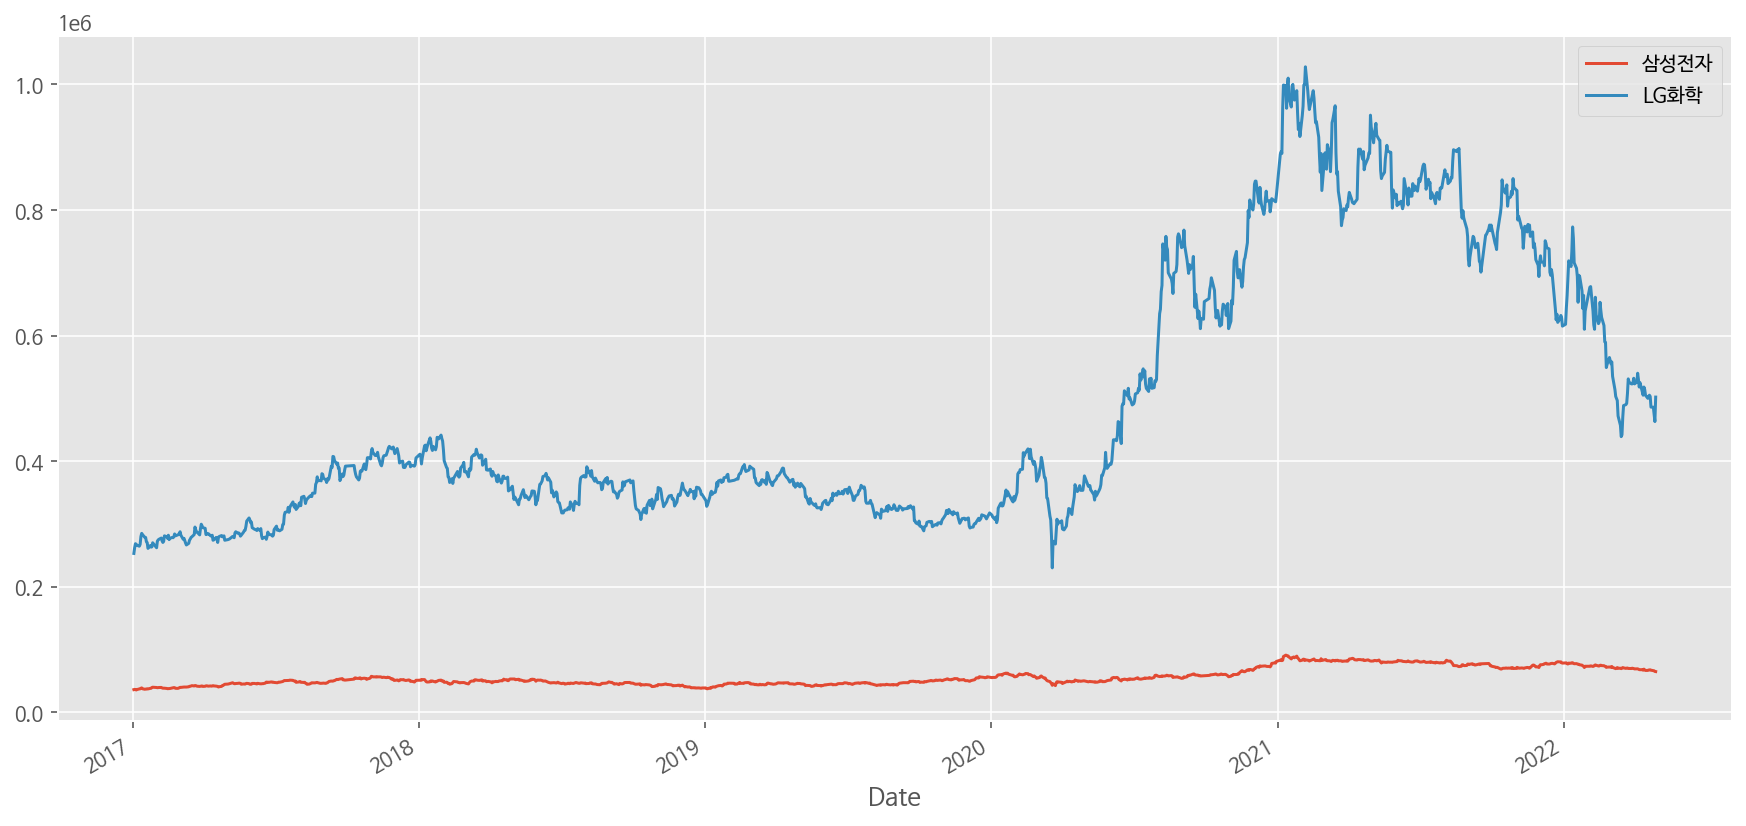

In [ ]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.
df[["삼성전자","LG화학"]].plot(figsize=(15,7))

## 2축 그래프 사용하기

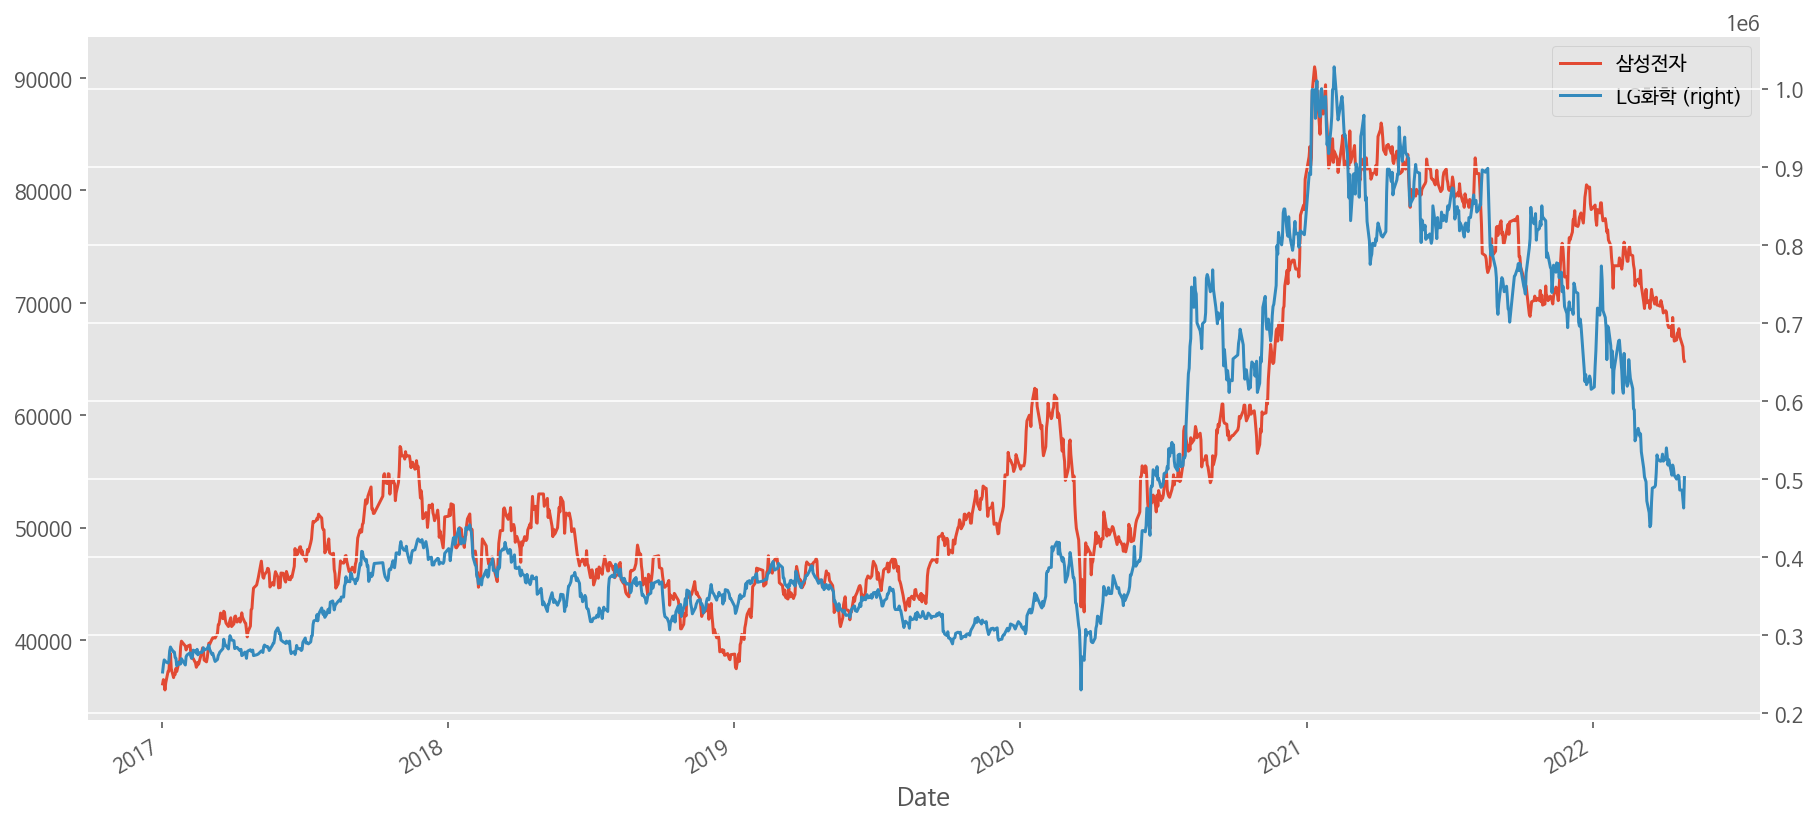

In [ ]:
# secondary_y를 사용해 2축 그래프 그리기
df[["삼성전자","LG화학"]].plot(figsize=(15,7), secondary_y="LG화학")

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [ ]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["삼성전자", "LG화학"]]
df2 = df2 / df2.iloc[0] -1
df2


,삼성전자,LG화학
Date,,
2017-01-02,0.000000,0.000000
2017-01-03,0.010526,0.035573
2017-01-04,0.001662,0.061265
2017-01-05,-0.014958,0.057312
2017-01-06,0.002770,0.051383
...,...,...
2022-04-22,0.855956,0.920949
2022-04-25,0.836565,0.920949
2022-04-26,0.831025,0.877470


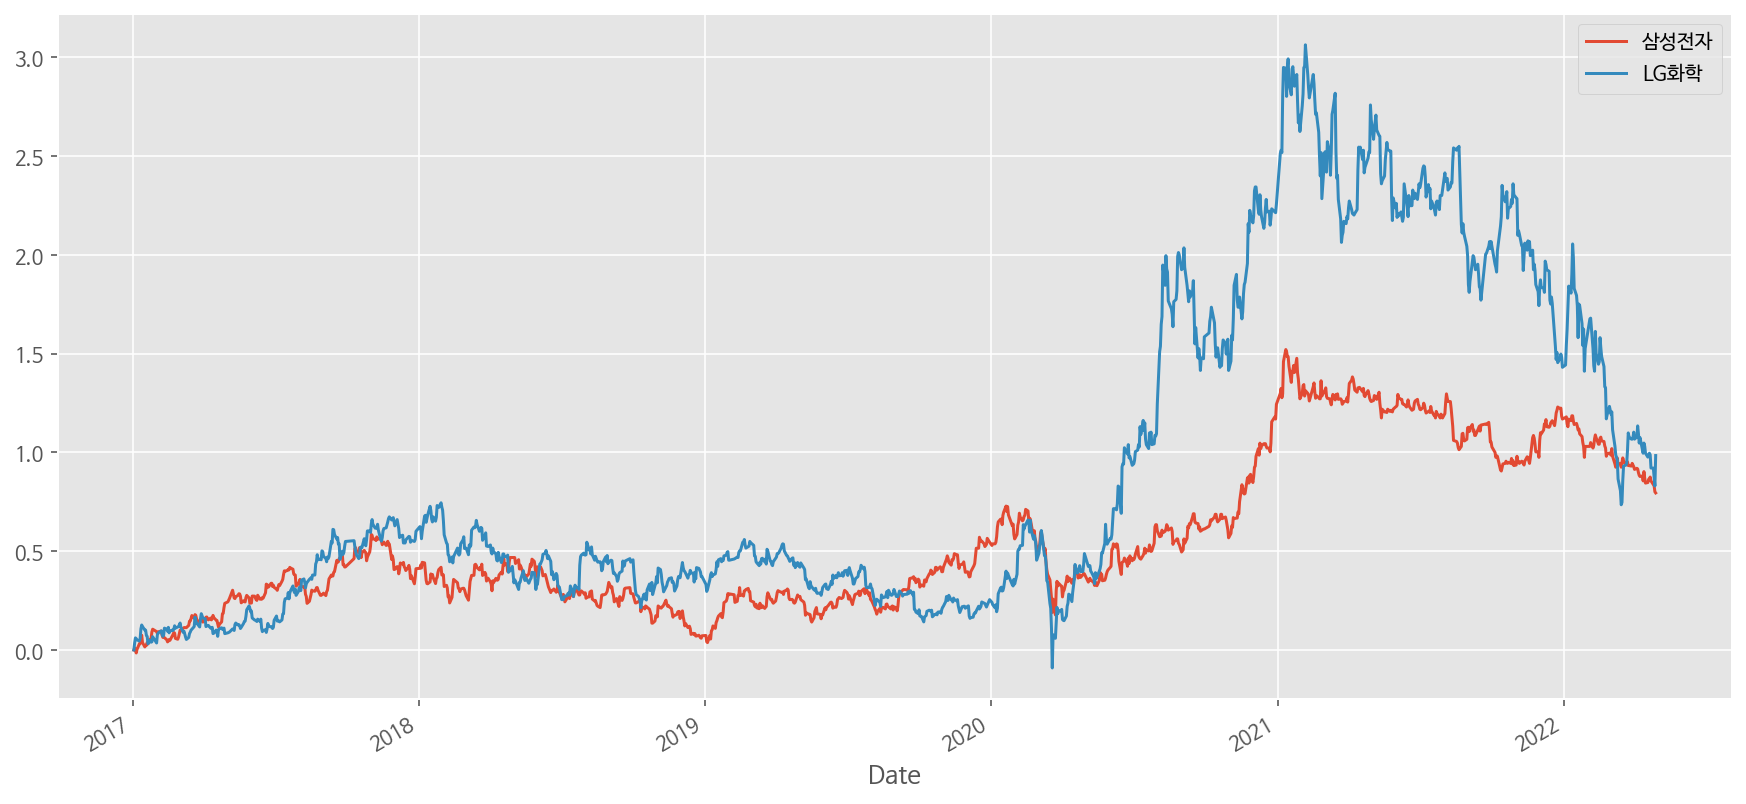

In [ ]:
# 수익률 시각화 하기
df2.plot(figsize = (15,7))

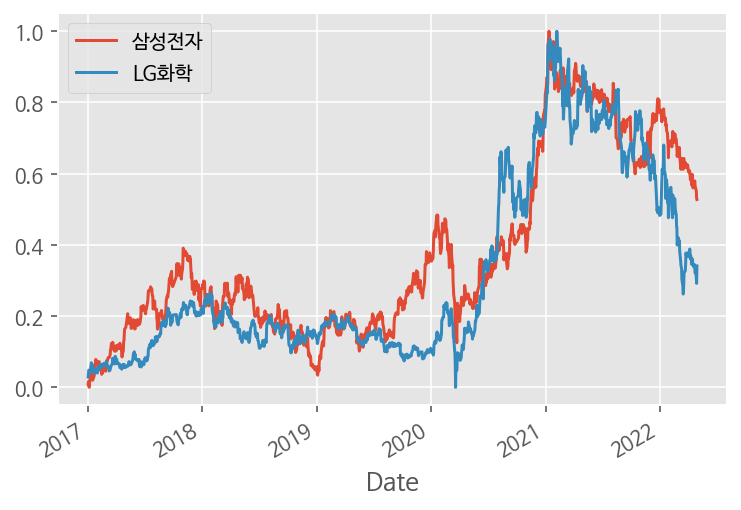

In [ ]:
func = lambda x: x.max() - x.min()
func_min = lambda x: x.min()
df2 = df[["삼성전자", "LG화학"]]
df2 = (df2-df2.apply(func_min))/df2.apply(func)
df2.plot()

## pyplot의 subplots 로 서브플롯 그리기

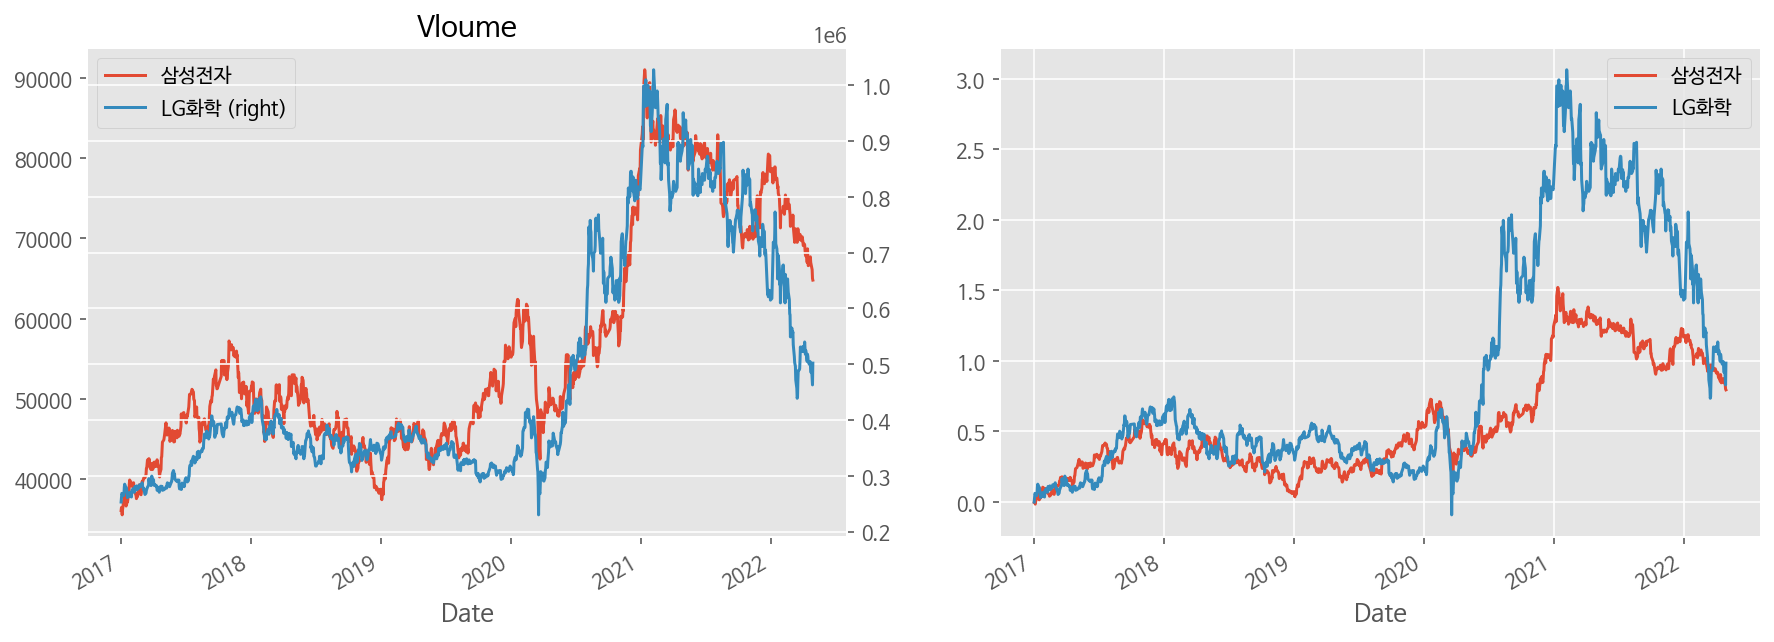

In [ ]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
#plt.subplots??
fig, ax = plt.subplots(figsize=(15,5),nrows=1,ncols=2)

df[["삼성전자", "LG화학"]].plot(ax=ax[0],title='Vloume', secondary_y ='LG화학')
df2.plot(ax=ax[1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07f8c48090>,
      dtype=object)

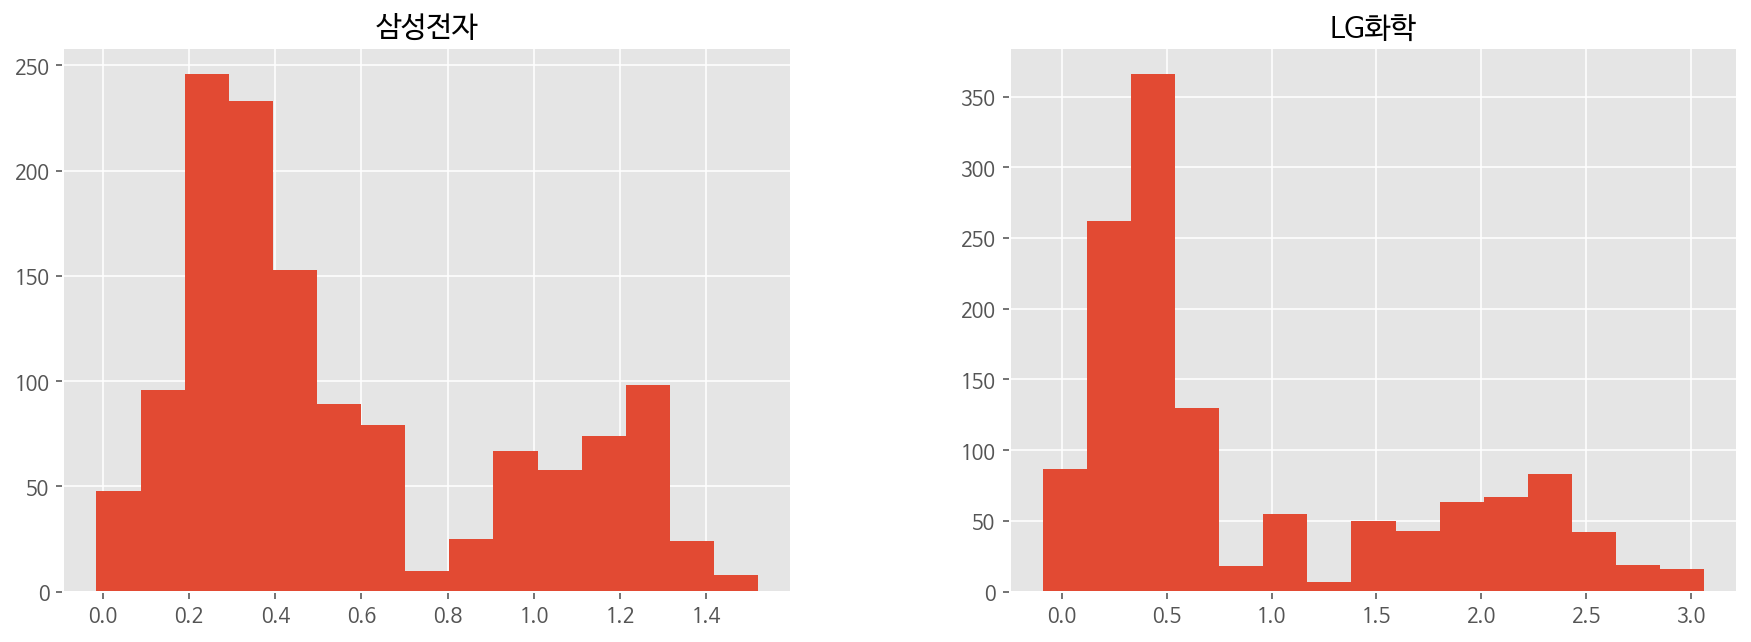

In [ ]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
df2.hist(bins=15, figsize=(15,5))

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [ ]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_v = df / df.iloc[0] -1
df_v

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2017-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-03,0.010526,0.031659,0.020000,-0.014781,0.035573,-0.017274,0.027888,-0.012871
2017-01-04,0.001662,0.015284,0.026667,-0.019404,0.061265,-0.023033,0.027888,0.042475
2017-01-05,-0.014958,0.025109,0.023333,-0.016632,0.057312,-0.049904,0.019920,0.018018
2017-01-06,0.002770,0.048035,0.006667,-0.026790,0.051383,-0.040307,0.027888,0.028313
...,...,...,...,...,...,...,...,...
2022-04-22,0.855956,1.412664,0.200000,0.626415,0.920949,0.134357,-0.123506,0.927773
2022-04-25,0.836565,1.358079,0.213333,0.590614,0.920949,0.097889,-0.139442,0.853875
2022-04-26,0.831025,1.423581,0.246667,0.718477,0.877470,0.090211,-0.135458,0.844236


### 전체 종목의 수익률 시각화

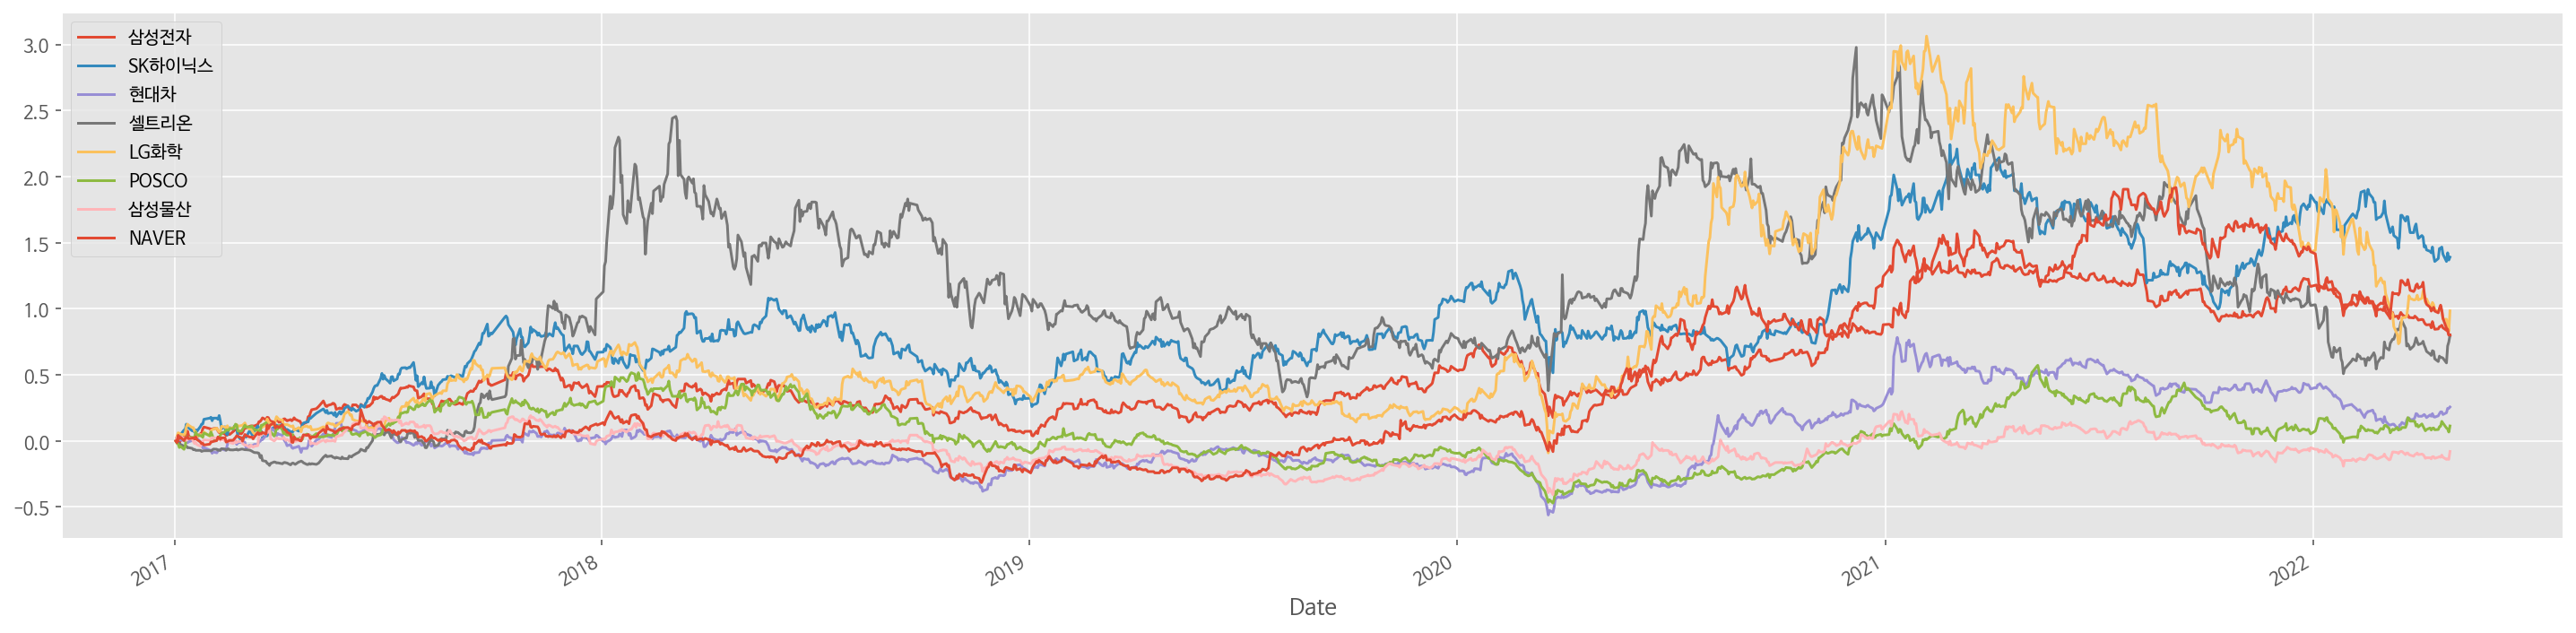

In [ ]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_v.plot(figsize=(25,6))

In [ ]:
# 계산된 수익률에 대한 기술통계값 구하기
df_v.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.559827,0.920721,0.042104,1.123291,0.916703,0.063378,-0.054169,0.437732
std,0.384044,0.504965,0.269648,0.699261,0.824778,0.212235,0.123214,0.644518
min,-0.014958,0.000000,-0.560667,-0.185759,-0.090909,-0.470250,-0.406375,-0.315641
25%,0.274238,0.600437,-0.160000,0.687314,0.316206,-0.086372,-0.139442,-0.033460
50%,0.410803,0.803493,-0.006667,1.058198,0.492095,0.055662,-0.047809,0.095428
75%,0.914820,1.248908,0.200000,1.697788,1.626482,0.243762,0.043825,0.985606
max,1.520776,2.242358,0.783333,2.978100,3.063241,0.571977,0.223108,1.917363


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07f87de5d0>,
      dtype=object)

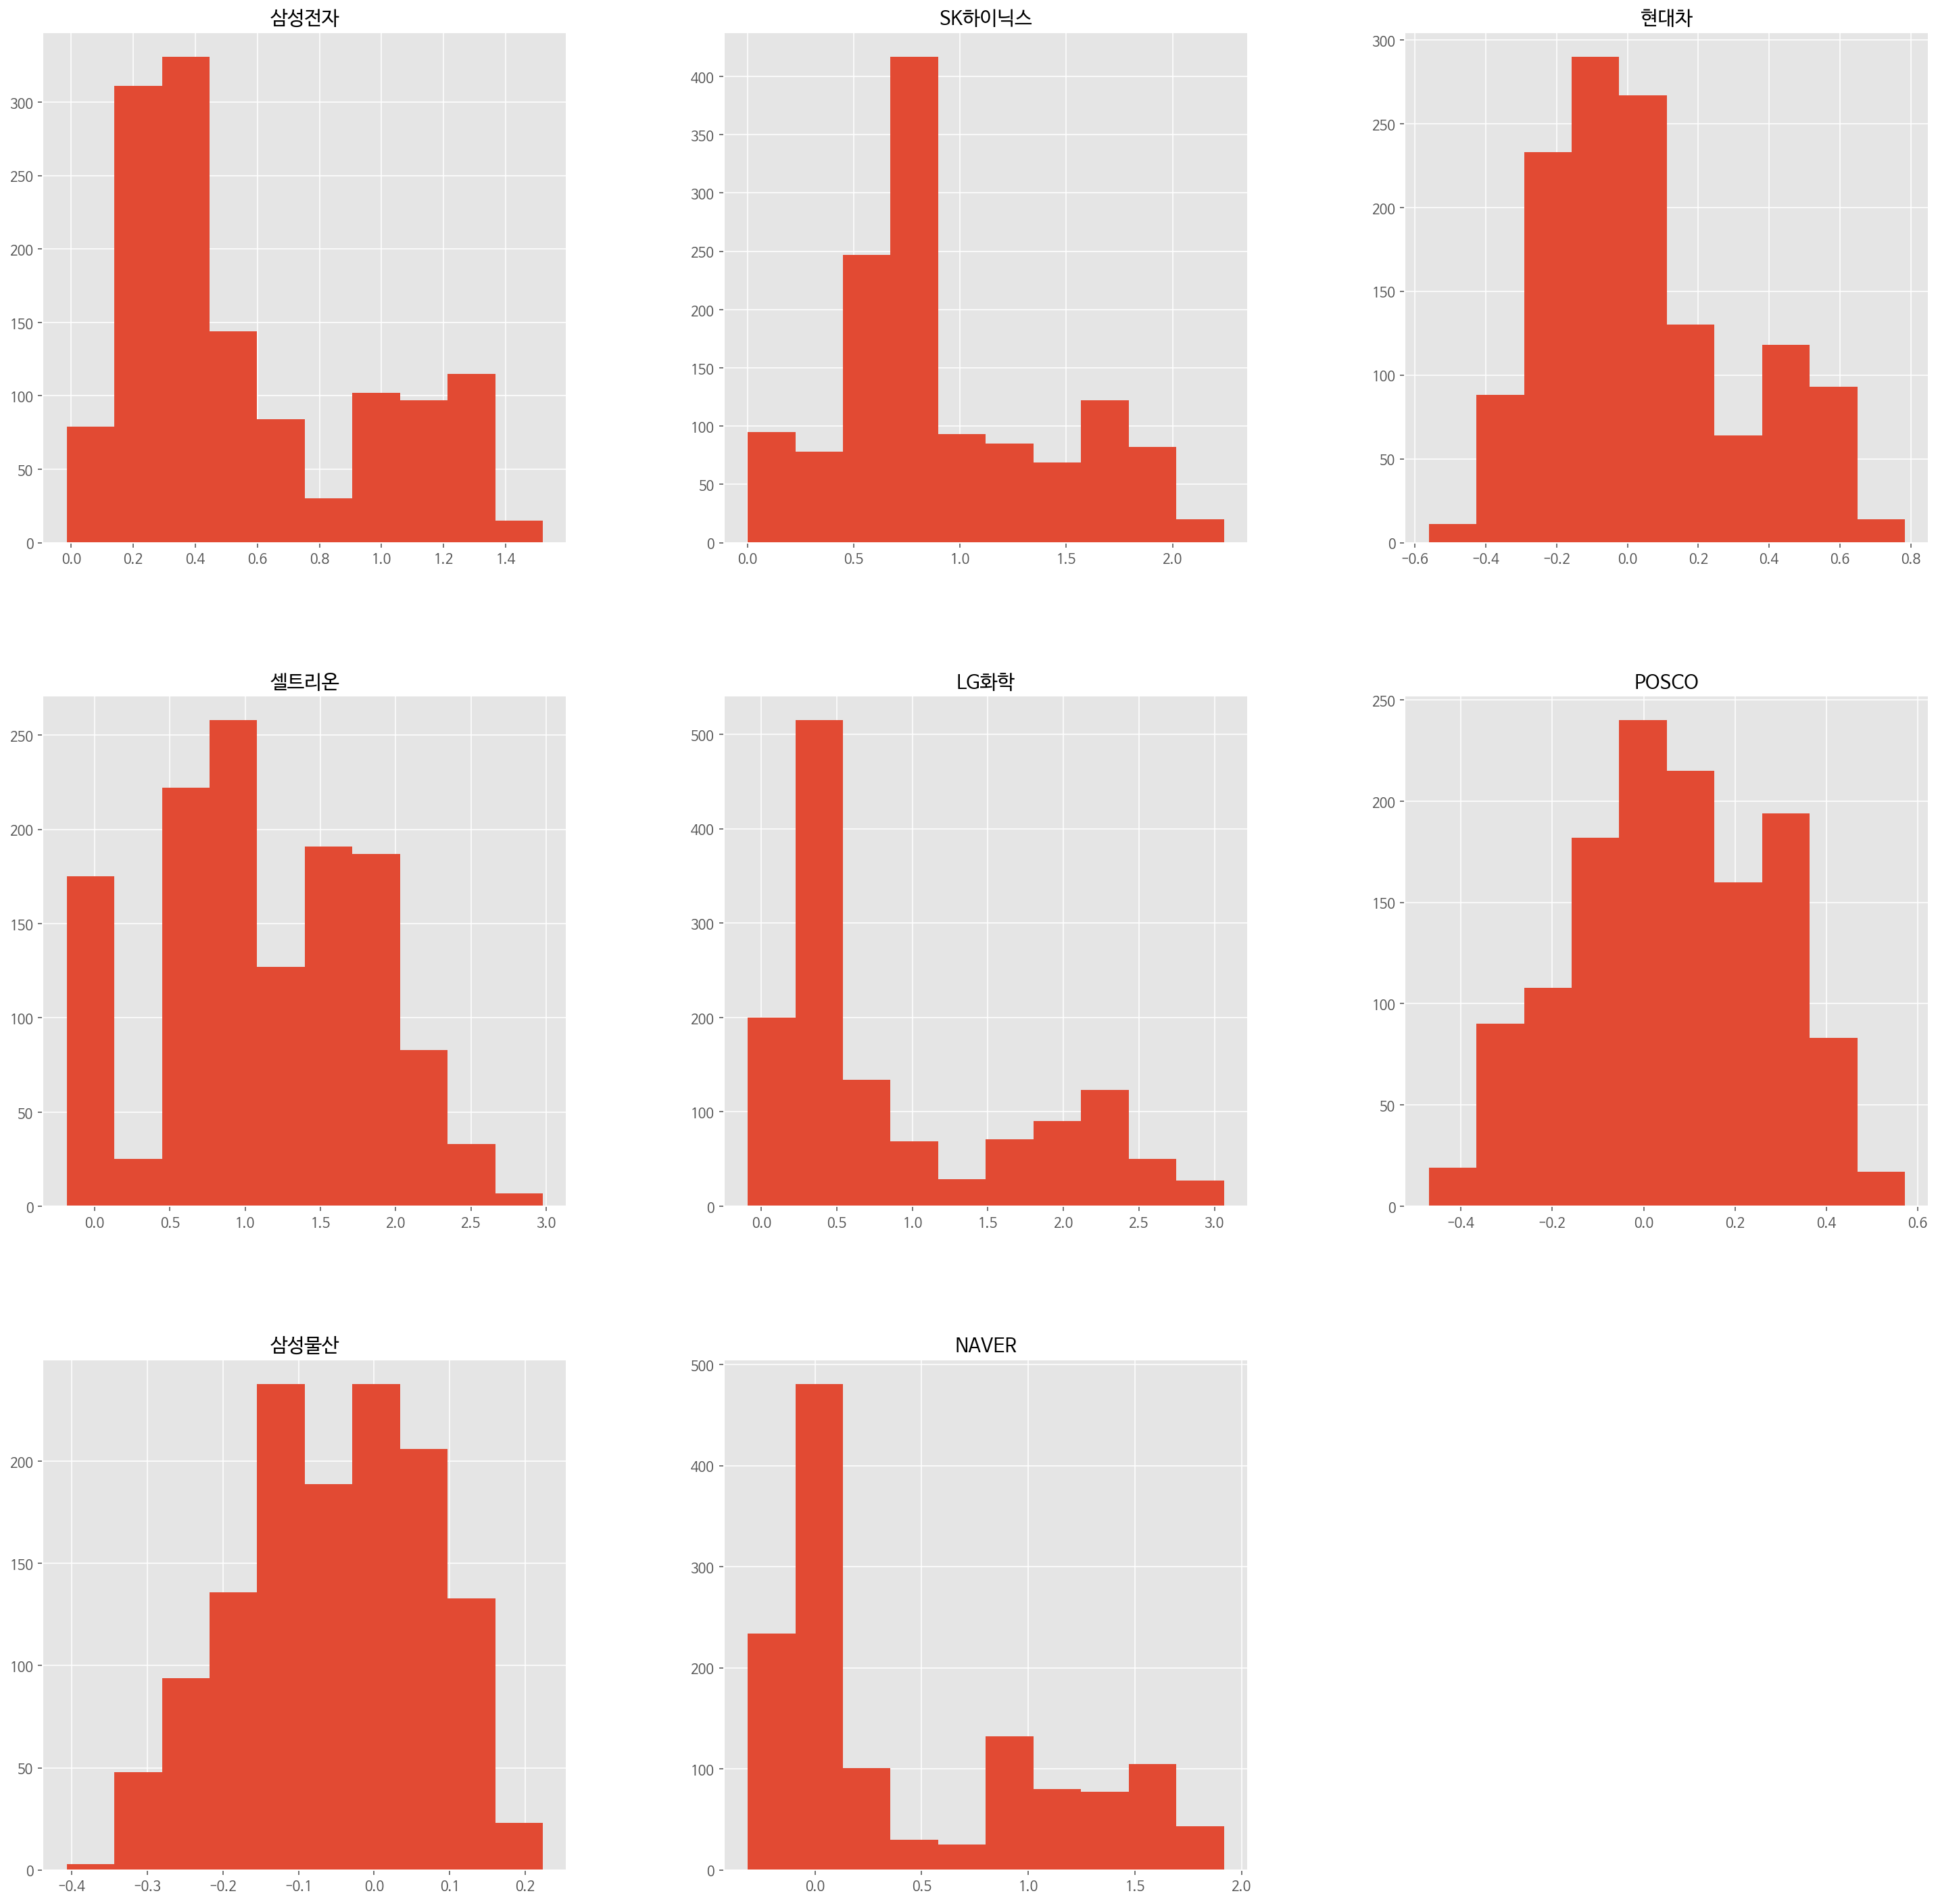

In [ ]:
# 수익률에 대한 히스토그램 그리기
df_v.hist(figsize=(25,25))

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [ ]:
# skew 로 수익률의 왜도를 구합니다.
df_v.skew()

삼성전자      0.782277
SK하이닉스    0.566983
현대차       0.601342
셀트리온     -0.034956
LG화학      0.938211
POSCO    -0.101902
삼성물산     -0.196930
NAVER     0.778897
dtype: float64

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

In [ ]:
# kurt 로 첨도를 구합니다.
df_v.kurt()

삼성전자     -0.730742
SK하이닉스   -0.453819
현대차      -0.439022
셀트리온     -0.713691
LG화학     -0.607148
POSCO    -0.728065
삼성물산     -0.723940
NAVER    -0.891458
dtype: float64